In [147]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn import metrics

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
from sklearn.metrics import adjusted_rand_score

import matplotlib.pyplot as plt
%matplotlib inline


german = pd.read_table("german.data", delimiter=' ', header=None)
german.columns = ['Status_Account', 'Duration', 'Credit_History', 'Purpose', 'Credit_Amount',
                     'Saving_Account', 'Present', 'Installment', 'Personal_Status', 'Other', 
                         'Residence', 'Property', 'Age', 'Other_Installment', 'Housing', 'Existing_Credits',
                             'Job', 'Liable_People', 'Tel', 'Foreign_Worker', 'Actual_Score']
target = german.iloc[:,-1]   # Enregistrer la varialbe target
german = german.iloc[:,0:-1]; # Enleveer la colonne target
german = german.drop(columns="Tel") # Enlever la colonne tel

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: read_table is deprecated, use read_csv instead.
  app.launch_new_instance()


In [141]:
def KMENAS(data):
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(data);
    #print(metrics.silhouette_score(np.reshape(list(target), (1000,-1)),kmeans.labels_))
    plt.figure('K-means with 3 clusters', figsize=(15,10))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=kmeans.labels_)
    plt.show()
    return pd.crosstab(target,kmeans.labels_)

#### OPERATIONS

# Feature Selection and Rescaling

In [4]:
data_cat = german.select_dtypes(include=['object'])
data_cat_og = german.select_dtypes(include=['object'])
data_num_og = german._get_numeric_data()
data_num = german._get_numeric_data()

for col in data_cat:
    onehot = pd.get_dummies(data_cat[col])
    data_cat = data_cat.drop(col,axis = 1)
    data_cat = data_cat.join(onehot)
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_num_sc = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)

data = [data_num_sc,data_cat]
data_join = pd.concat(data,axis=1)

In [5]:
datalist = ["data_num_sc","data_cat","data_join"]

# MODELS

### Quanti

## without PCA

-0.00697607244405123


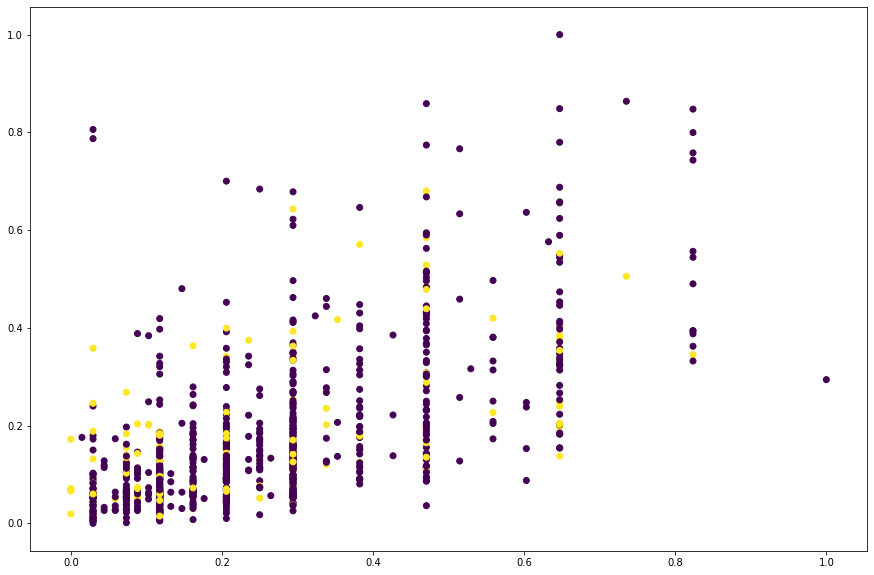

col_0,0,1
Actual_Score,,
1,591,109
2,254,46


In [23]:
KMENAS(data_num_sc)

## with PCA

-0.0045818370740903416


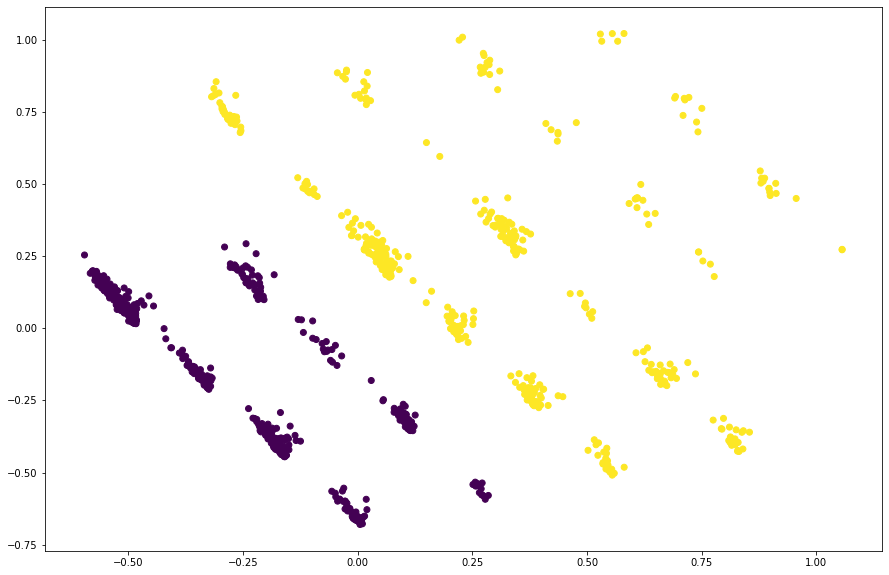

col_0,0,1
Actual_Score,,
1,372,328
2,172,128


In [24]:
reduced_data = PCA(n_components=2).fit_transform(data_num_sc)
reduced_num = pd.DataFrame(reduced_data)
KMENAS(reduced_num)

# Quali

## without PCA

0.024016001786591787


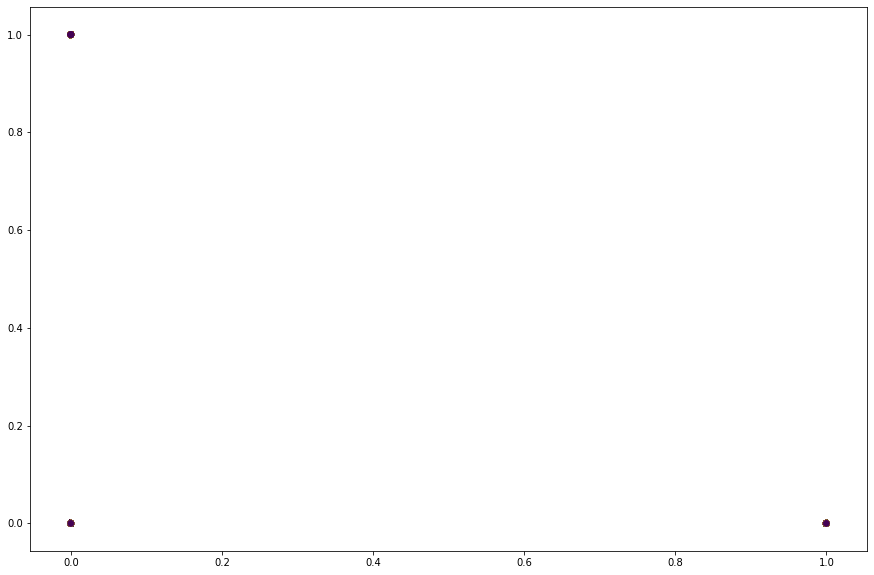

col_0,0,1
Actual_Score,,
1,406,294
2,147,153


In [25]:
KMENAS(data_cat)

## with PCA

0.023424171336198996


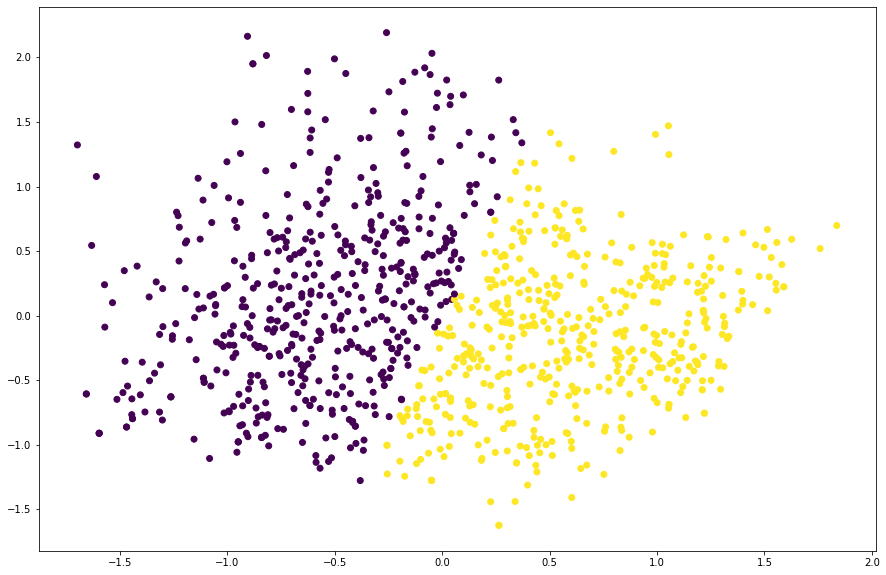

col_0,0,1
Actual_Score,,
1,383,317
2,128,172


In [26]:
reduced_data = PCA(n_components=2).fit_transform(data_cat)
reduced_cat = pd.DataFrame(reduced_data)
KMENAS(reduced_cat)

# Both

## without PCA

0.024016001786591787


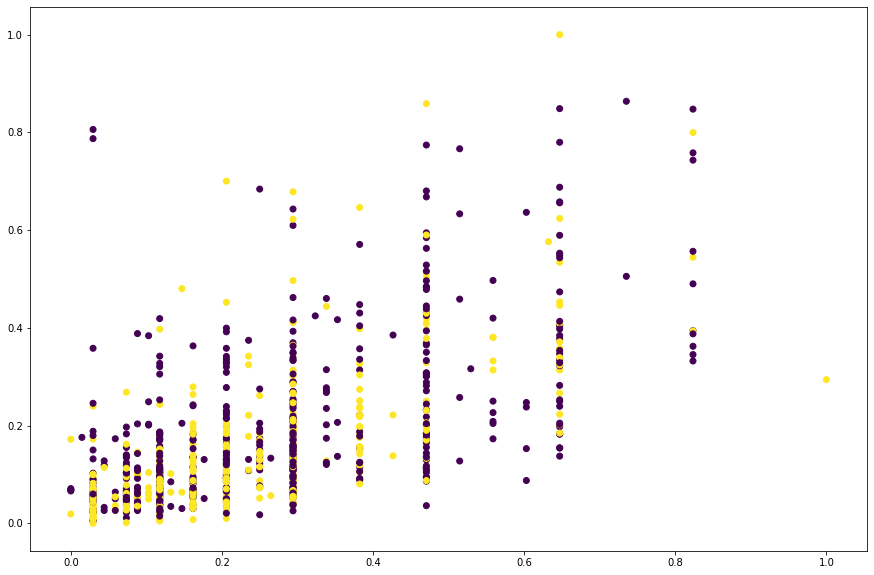

col_0,0,1
Actual_Score,,
1,406,294
2,147,153


In [27]:
KMENAS(data_join)

## with PCA

0.02330555384155985


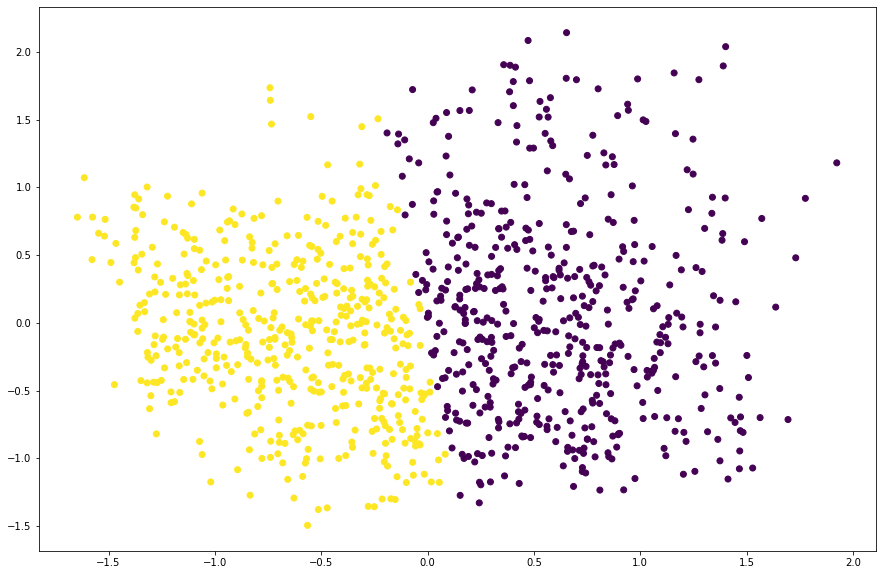

col_0,0,1
Actual_Score,,
1,385,315
2,130,170


In [28]:
reduced_data = PCA(n_components=2).fit_transform(data_join)
reduced_join = pd.DataFrame(reduced_data)
KMENAS(reduced_join)

## with Kernell PCA

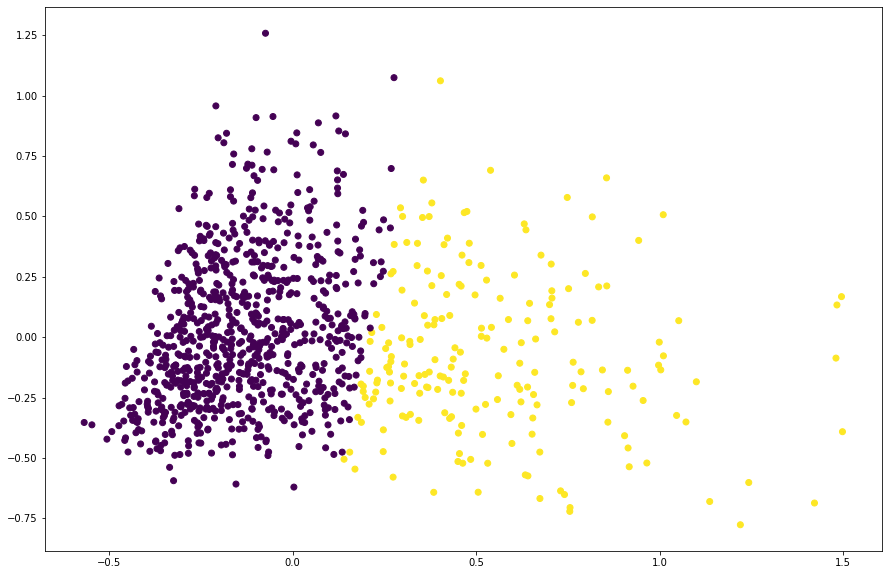

col_0,0,1
Actual_Score,,
1,593,107
2,207,93


In [154]:
kpca = KernelPCA(n_components=2,kernel="poly")
X_kpca = kpca.fit_transform(data_join)
reduced_join_PCA = pd.DataFrame(X_kpca)
KMENAS(reduced_join_PCA)

## with kernell PCA rbf

0.022542686403086685


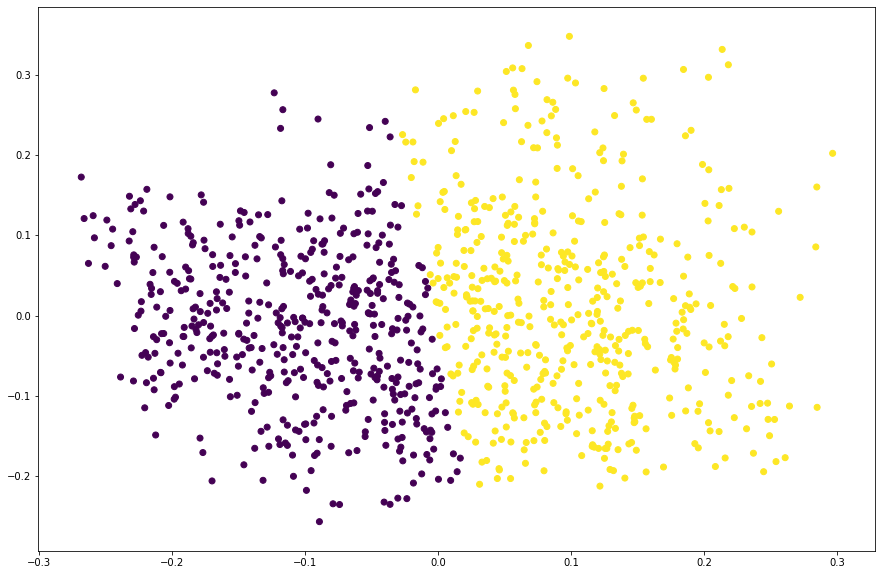

col_0,0,1
Actual_Score,,
1,317,383
2,171,129


In [103]:
kpca = KernelPCA(n_components=2,kernel="rbf")
X_kpca = kpca.fit_transform(data_join)
reduced_join_PCA = pd.DataFrame(X_kpca)
KMENAS(reduced_join_PCA)

## with SVD

In [104]:
from sklearn.decomposition import TruncatedSVD


0.030788172090712464


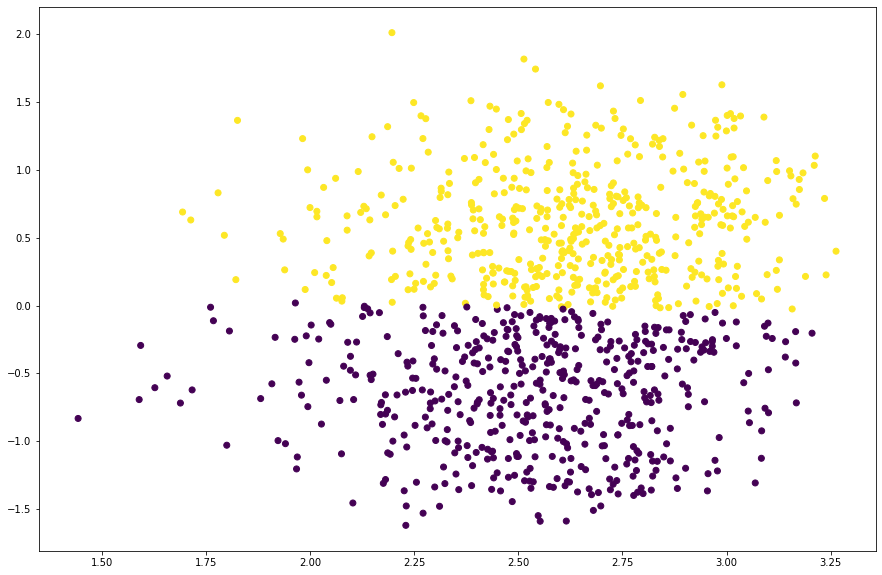

col_0,0,1
Actual_Score,,
1,315,385
2,178,122


In [107]:
svd = TruncatedSVD(n_components=2)
german_reduced_svd = svd.fit_transform(data_join)
reduced_join_SVD = pd.DataFrame(german_reduced_svd)
KMENAS(reduced_join_SVD)

## SVD and StandardScaler

0.14547767168436973


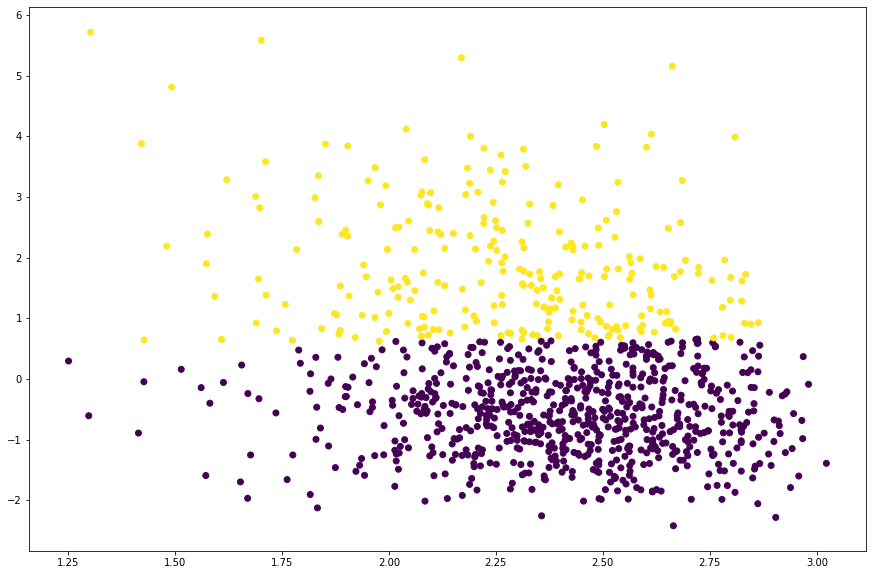

col_0,0,1
Actual_Score,,
1,554,146
2,190,110


In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_num_sc = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)

data = [data_num_sc,data_cat]
data_join = pd.concat(data,axis=1)

svd = TruncatedSVD(n_components=2)
german_reduced_svd = svd.fit_transform(data_join)
reduced_join_SVD = pd.DataFrame(german_reduced_svd)
KMENAS(reduced_join_SVD)

# Enlever la variable Duration (Duration and credit_amount sont corréleés)

In [146]:
german2 = pd.read_table("german.data", delimiter=' ', header=None)
german2.columns = ['Status_Account', 'Duration', 'Credit_History', 'Purpose', 'Credit_Amount',
                     'Saving_Account', 'Present', 'Installment', 'Personal_Status', 'Other', 
                         'Residence', 'Property', 'Age', 'Other_Installment', 'Housing', 'Existing_Credits',
                             'Job', 'Liable_People', 'Tel', 'Foreign_Worker', 'Actual_Score']
target2 = german.iloc[:,-1]   # Enregistrer la varialbe target
german2 = german2.iloc[:,0:-1]; # Enleveer la colonne target
german2 = german2.drop(columns="Tel") # Enlever la colonne tel
german2 = german2.drop(columns="Duration") # Enlever la colonne Duration


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


## Feature Selection 

In [143]:

data_cat2 = german2.select_dtypes(include=['object'])
data_cat_og2 = german2.select_dtypes(include=['object'])
data_num_og2 = german2._get_numeric_data()
data_num2 = german2._get_numeric_data()

for col in data_cat2:
    onehot2 = pd.get_dummies(data_cat2[col])
    data_cat2 = data_cat2.drop(col,axis = 1)
    data_cat2 = data_cat2.join(onehot2)
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_num_sc2 = pd.DataFrame(scaler.fit_transform(data_num2), columns=data_num2.columns)

data2 = [data_num_sc2,data_cat2]
data_join2 = pd.concat(data2,axis=1)

## with PCA

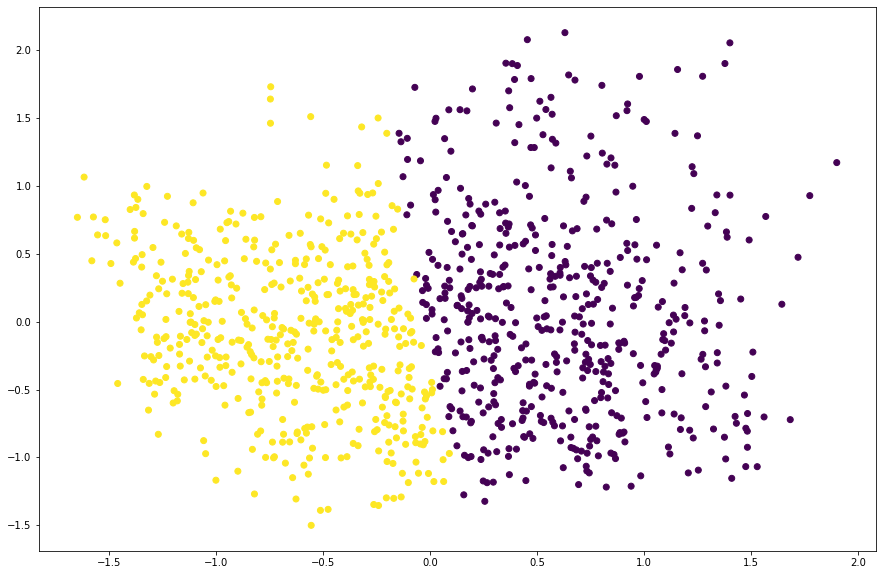

col_0,0,1
Actual_Score,,
1,386,314
2,130,170


In [148]:
reduced_data2 = PCA(n_components=2).fit_transform(data_join2)
reduced_join2 = pd.DataFrame(reduced_data2)
KMENAS(reduced_join2)

## with kernell PCA rbf

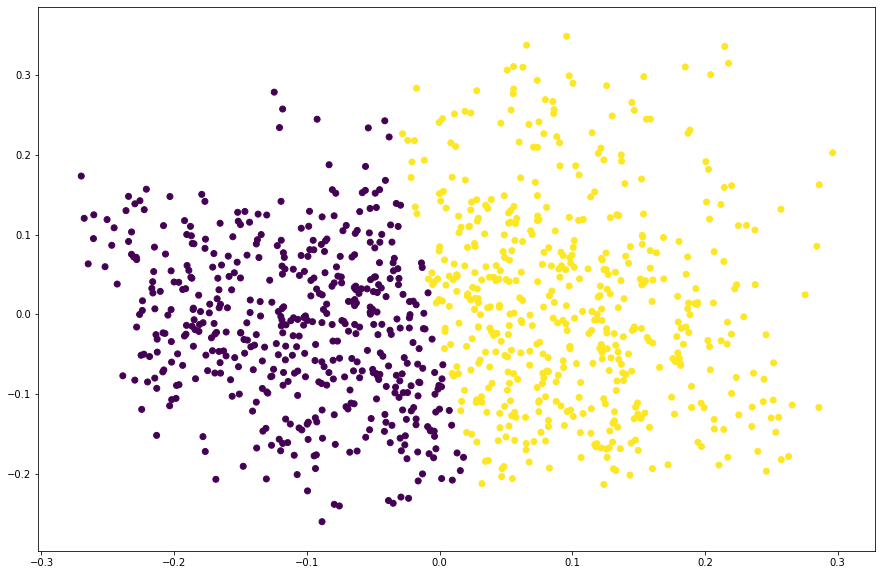

col_0,0,1
Actual_Score,,
1,315,385
2,171,129


In [149]:
kpca2 = KernelPCA(n_components=2,kernel="rbf")
X_kpca2 = kpca.fit_transform(data_join2)
reduced_join_PCA2 = pd.DataFrame(X_kpca2)
KMENAS(reduced_join_PCA2)

## with kernell PCA poly

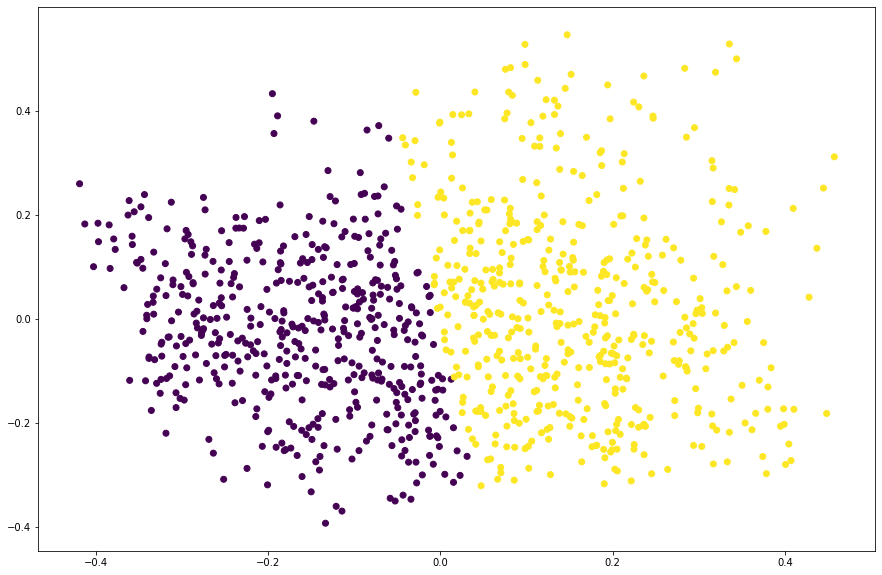

col_0,0,1
Actual_Score,,
1,318,382
2,172,128


In [156]:
kpca = KernelPCA(n_components=2,kernel="poly")
X_kpca = kpca.fit_transform(data_join2)
reduced_join_PCA = pd.DataFrame(X_kpca)
KMENAS(reduced_join_PCA)

# with SVD

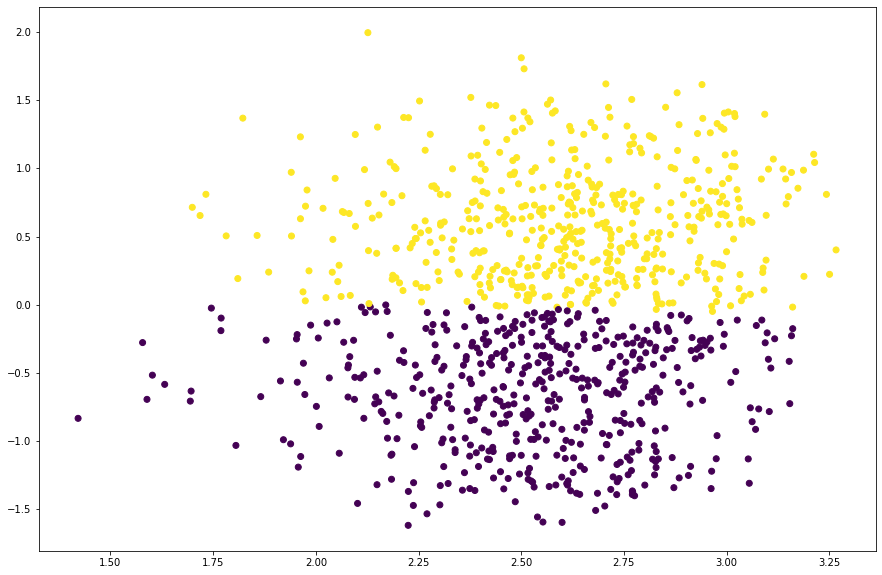

col_0,0,1
Actual_Score,,
1,312,388
2,176,124


In [150]:
svd2 = TruncatedSVD(n_components=2)
german_reduced_svd2 = svd.fit_transform(data_join2)
reduced_join_SVD2 = pd.DataFrame(german_reduced_svd2)
KMENAS(reduced_join_SVD2)